In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
sys.path.insert(0, 'C:/Users/amanu/OneDrive/Desktop/Stock-Market-Analysis/')

In [2]:
raw_analyst_ratings_df=pd.read_csv('../data/raw_analyst_ratings.csv')

In [7]:
# Obtain basic statistics for textual lengths (like headline length)
headline_length = raw_analyst_ratings_df['headline'].apply(len)
print("Headline Length Statistics:")
print(headline_length.describe())

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline, dtype: float64


In [10]:
# Count the number of articles per publisher to identify which publishers are most active
publisher_counts = raw_analyst_ratings_df['publisher'].value_counts()
print("\nPublisher Article Counts:")
print(publisher_counts.head(10))  # Print the top 10 most active publishers


Publisher Article Counts:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


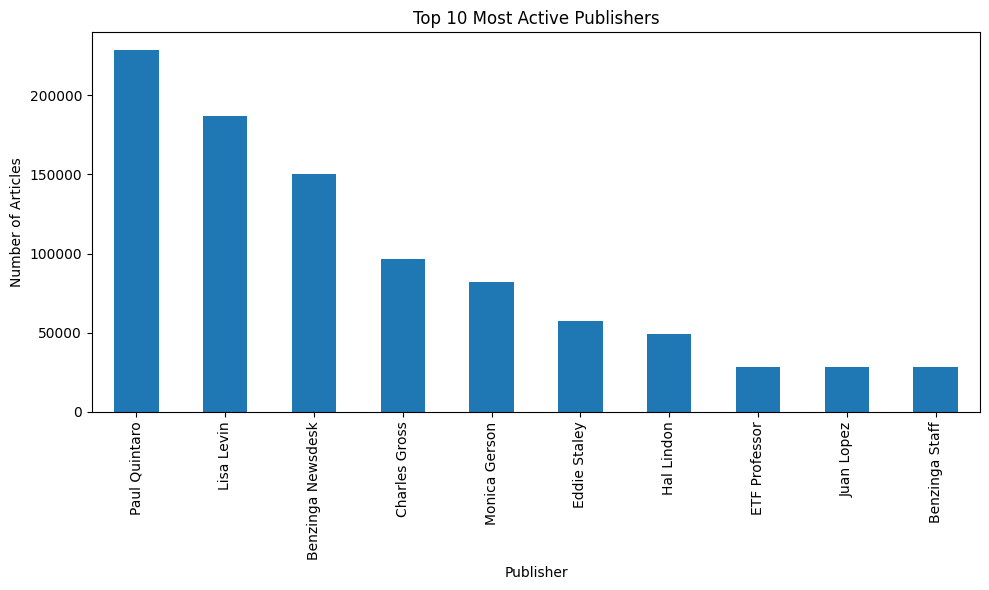

In [11]:
# Plot a bar chart to visualize the publisher article counts
plt.figure(figsize=(10, 6))
publisher_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Active Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [14]:
# Analyze the publication dates to see trends over time
raw_analyst_ratings_df['date'] = pd.to_datetime(raw_analyst_ratings_df['date'], format='ISO8601', utc=False)
publication_counts = raw_analyst_ratings_df['date'].dt.date.value_counts().sort_index()
print("\nPublication Date Counts:")
print(publication_counts)



Publication Date Counts:
date
2009-02-14      1
2009-04-27      2
2009-04-29      1
2009-05-22      1
2009-05-27      6
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, Length: 3955, dtype: int64


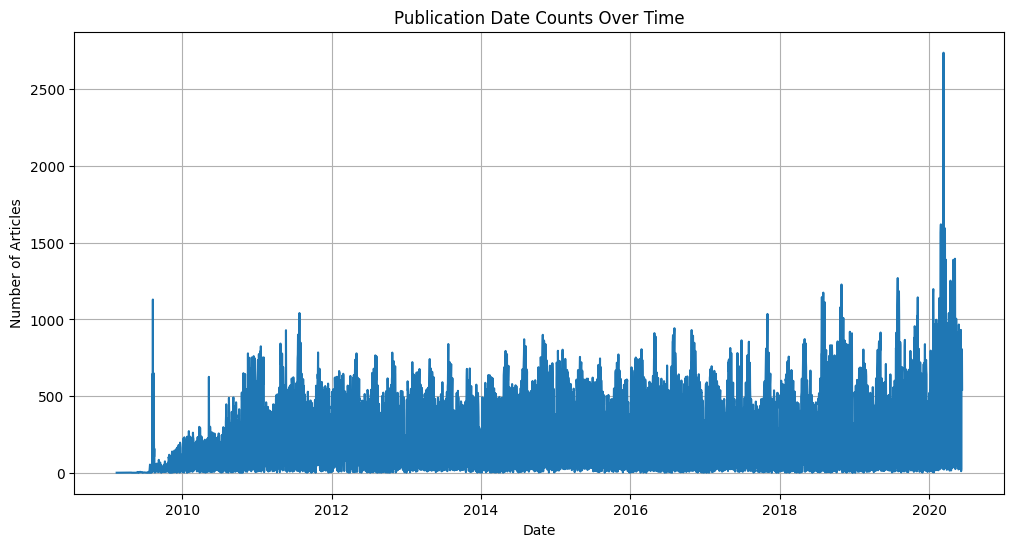

In [15]:
# Plot a line chart to visualize the publication date counts
plt.figure(figsize=(12, 6))
publication_counts.plot(kind='line')
plt.title('Publication Date Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

In [16]:
# Analyze the publication dates to see trends over time (by day of the week)
raw_analyst_ratings_df['day_of_week'] = raw_analyst_ratings_df['date'].dt.day_name()
day_of_week_counts = raw_analyst_ratings_df['day_of_week'].value_counts()
print("\nDay of the Week Counts:")
print(day_of_week_counts)


Day of the Week Counts:
day_of_week
Thursday     302595
Wednesday    300940
Tuesday      296470
Monday       265164
Friday       217892
Sunday        16514
Saturday       7753
Name: count, dtype: int64


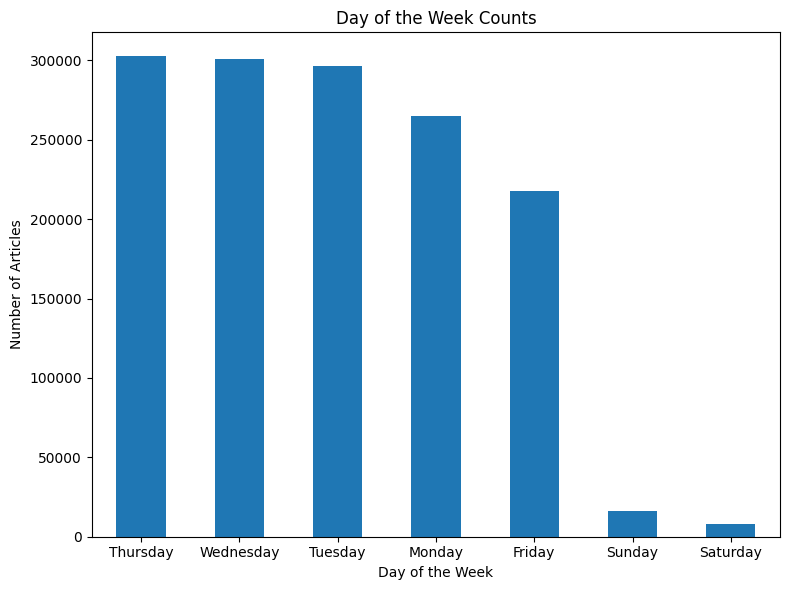

In [17]:
# Plot a bar chart to visualize the day of the week counts
plt.figure(figsize=(8, 6))
day_of_week_counts.plot(kind='bar')
plt.title('Day of the Week Counts')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [18]:
# Analyze the publication dates to see trends over time (by stock)
stock_counts = raw_analyst_ratings_df['stock'].value_counts()
print("\nStock Article Counts:")
print(stock_counts.head(10))  # Print the top 10 most frequently mentioned stocks


Stock Article Counts:
stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
NFLX    3028
M       3025
EBAY    3018
GILD    2968
VZ      2966
Name: count, dtype: int64


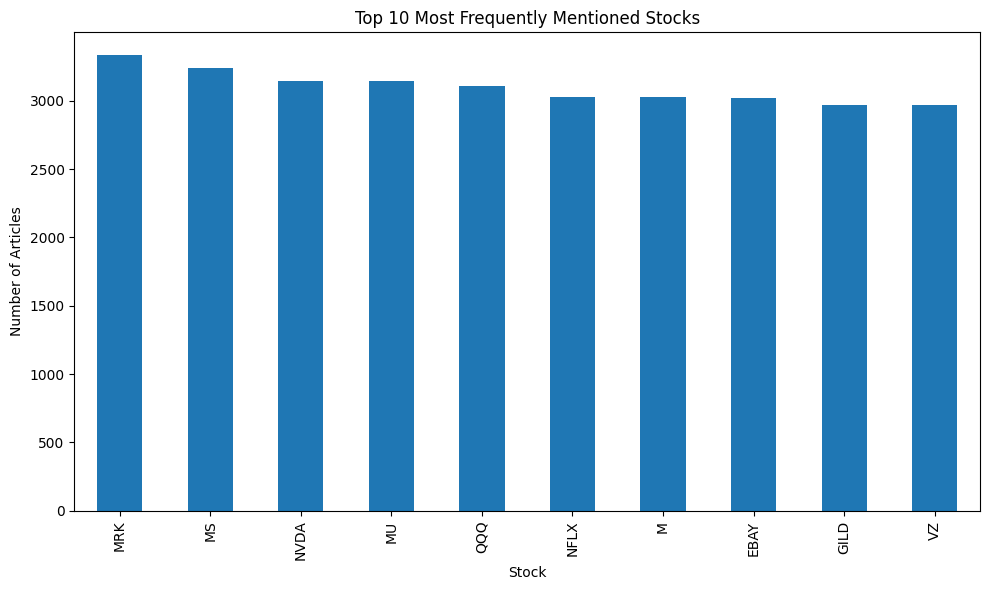

In [19]:
# Plot a bar chart to visualize the stock article counts
plt.figure(figsize=(10, 6))
stock_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Frequently Mentioned Stocks')
plt.xlabel('Stock')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [9]:
data_snippet = raw_analyst_ratings_df.head(50)

In [4]:
import pandas as pd

# Load the CSV file
raw_analyst_ratings_df=pd.read_csv('../data/raw_analyst_ratings.csv')

# Display the first few rows to understand the structure
print(raw_analyst_ratings_df.head())

# Check for any missing values
print(raw_analyst_ratings_df.info())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [5]:

# Inspect the date column to understand its format
print(raw_analyst_ratings_df['date'].head(20))

# Convert the 'date' column to datetime
raw_analyst_ratings_df['date'] = pd.to_datetime(
    raw_analyst_ratings_df['date'], errors='coerce'
)

# Check the conversion
print(raw_analyst_ratings_df['date'].head(20))


0     2020-06-05 10:30:54-04:00
1     2020-06-03 10:45:20-04:00
2     2020-05-26 04:30:07-04:00
3     2020-05-22 12:45:06-04:00
4     2020-05-22 11:38:59-04:00
5     2020-05-22 11:23:25-04:00
6     2020-05-22 09:36:20-04:00
7     2020-05-22 09:07:04-04:00
8     2020-05-22 08:37:59-04:00
9     2020-05-22 08:06:17-04:00
10          2020-05-22 00:00:00
11          2020-05-22 00:00:00
12          2020-05-21 00:00:00
13          2020-05-21 00:00:00
14          2020-05-21 00:00:00
15          2020-05-21 00:00:00
16          2020-05-18 00:00:00
17          2020-05-16 00:00:00
18          2020-05-15 00:00:00
19          2020-05-08 00:00:00
Name: date, dtype: object
0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
5    2020-05-22 11:23:25-04:00
6    2020-05-22 09:36:20-04:00
7    2020-05-22 09:07:04-04:00
8    2020-05-22 08:37:59-04:00
9    2020-05-22 08:06:17-04:00
10                      

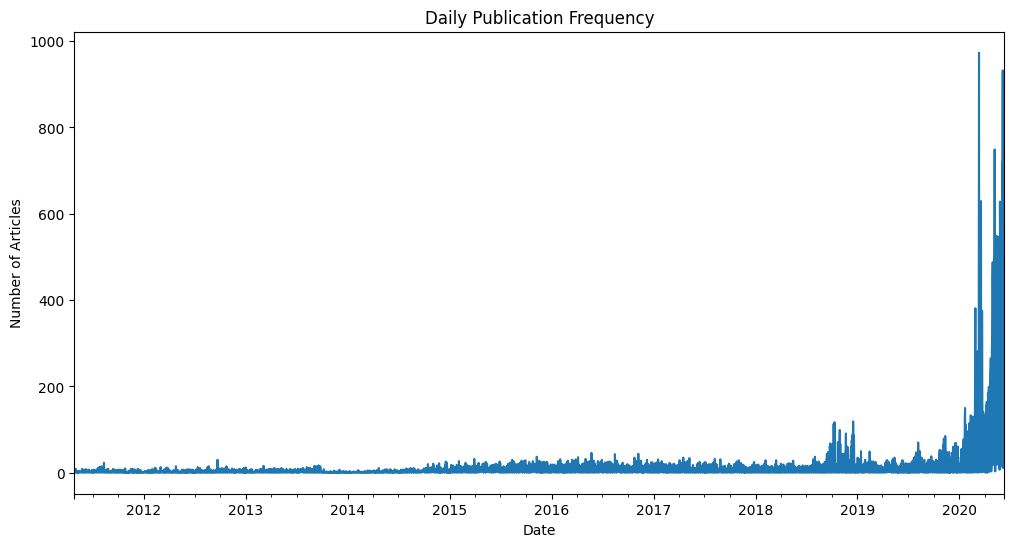

In [6]:
# Resample data to get daily publication frequency
daily_publications = raw_analyst_ratings_df.resample('D', on='date').size()

# Plotting the daily publication frequency
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
daily_publications.plot()
plt.title('Daily Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


C:\Users\amanu\AppData\Local\Temp\ipykernel_600\2060483650.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_publications = raw_analyst_ratings_df.resample('M', on='date').size()


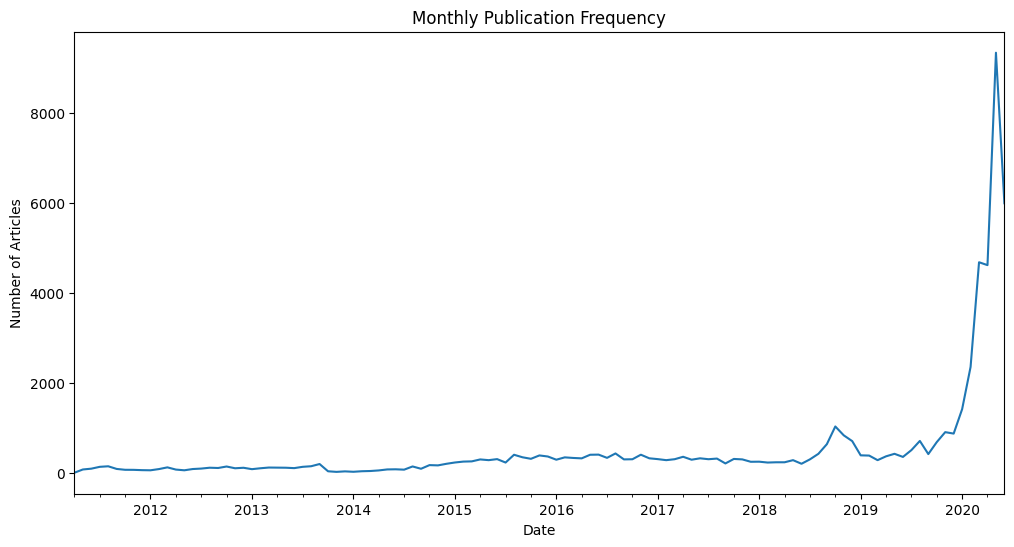

In [7]:
# Resample data to get monthly publication frequency
monthly_publications = raw_analyst_ratings_df.resample('M', on='date').size()

# Plotting the monthly publication frequency
plt.figure(figsize=(12, 6))
monthly_publications.plot()
plt.title('Monthly Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


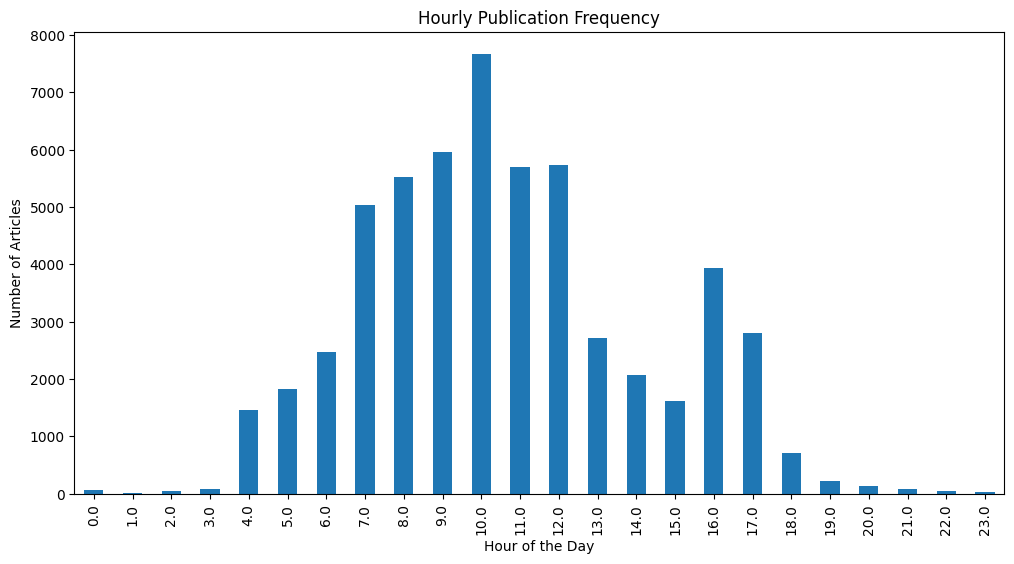

In [8]:
# Extract the hour from the date column
raw_analyst_ratings_df['hour'] = raw_analyst_ratings_df['date'].dt.hour

# Calculate the hourly publication frequency
hourly_publications = raw_analyst_ratings_df.groupby('hour').size()

# Plotting the hourly publication frequency
plt.figure(figsize=(12, 6))
hourly_publications.plot(kind='bar')
plt.title('Hourly Publication Frequency')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.show()


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Load the data from CSV
file_path = '../data/raw_analyst_ratings.csv'  # Update with your file path
data = pd.read_csv(file_path, parse_dates=['date'])

# Count headlines per day
daily_headlines = data.groupby('date').size()

# Create a DataFrame for time series analysis
time_series_data = pd.DataFrame({'date': daily_headlines.index, 'Headlines_Count': daily_headlines.values})
time_series_data.set_index('date', inplace=True)


In [10]:
print(time_series_data)

                           Headlines_Count
date                                      
2009-02-14 00:00:00                      1
2009-04-27 00:00:00                      2
2009-04-29 00:00:00                      1
2009-05-22 00:00:00                      1
2009-05-27 00:00:00                      6
...                                    ...
2020-06-11 16:49:41-04:00                1
2020-06-11 16:51:33-04:00                1
2020-06-11 17:01:39-04:00                1
2020-06-11 17:11:20-04:00                1
2020-06-11 17:12:35-04:00                1

[39957 rows x 1 columns]


C:\Users\amanu\AppData\Local\Temp\ipykernel_600\2861825932.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_headlines = data.resample('M').size()


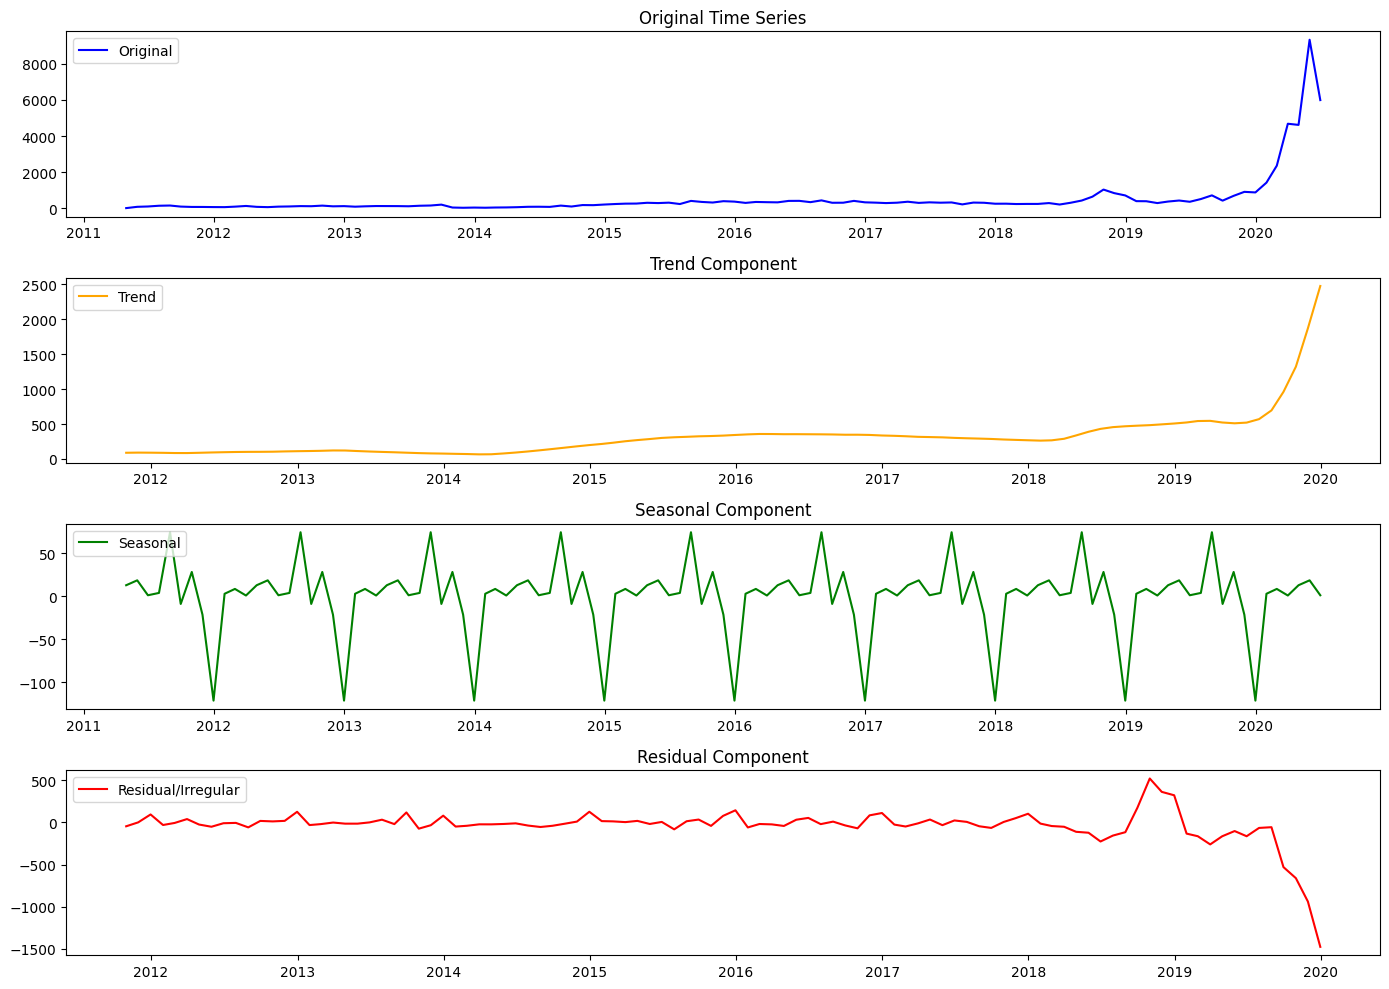

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data from CSV
file_path = '../data/raw_analyst_ratings.csv'  # Update with your file path
data = pd.read_csv(file_path, parse_dates=['date'])


# Convert 'date' column to datetime and handle mixed formats
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Drop rows with invalid dates (if any)
data = data.dropna(subset=['date'])

# Remove timezone information
data['date'] = data['date'].dt.tz_localize(None)

# Set 'date' as the index
data.set_index('date', inplace=True)

# Resample to monthly frequency by counting the number of headlines per month
monthly_headlines = data.resample('M').size()

# Rename the series to 'Headlines_Count'
monthly_headlines = monthly_headlines.rename('Headlines_Count')

# Decompose the time series using an additive model
decomposition = seasonal_decompose(monthly_headlines, model='additive', period=12)

# Plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(monthly_headlines, label='Original', color='blue')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

C:\Users\amanu\AppData\Local\Temp\ipykernel_600\1216689194.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="viridis")


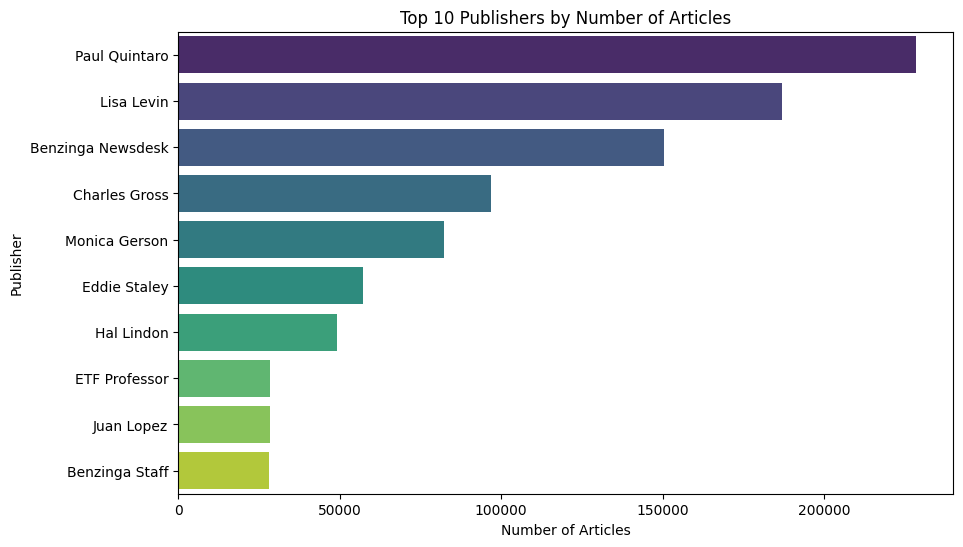

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\amanu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


TypeError: string indices must be integers, not 'str'

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from CSV
file_path = '../data/raw_analyst_ratings.csv'  # Update with your actual file path
data = pd.read_csv(file_path, parse_dates=['date'])

# Check the first few rows of the dataset to ensure it's loaded correctly
print(data.head())

# Check for missing values in the publisher column
print(f"Missing values in publisher column: {data['publisher'].isnull().sum()}")

# Drop rows with missing publisher information (if any)
data = data.dropna(subset=['publisher'])

# Count the number of articles per publisher
publisher_counts = data['publisher'].value_counts()

# Display the top publishers by article count
top_publishers = publisher_counts.head(10)
print(top_publishers)

# Plot the top publishers by article count
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="viridis")
plt.title("Top 10 Publishers by Number of Articles")
plt.xlabel("Number of Articles")
plt.ylabel("Publisher")
plt.show()


# Analyze differences in the type of news they report (if there is a 'category' or 'topic' column)
# Assuming there's a 'headline' column for this example

# Example: Basic sentiment analysis using VADER (if you have sentiment analysis)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Ensure that you have the VADER lexicon downloaded
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the headlines
file_path['sentiment_score'] = file_path['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Group by publisher to see the average sentiment score
publisher_sentiment = file_path.groupby('publisher')['sentiment_score'].mean().sort_values(ascending=False)

# Display the top 10 publishers by average sentiment score
print("Top 10 Publishers by Average Sentiment Score:")
print(publisher_sentiment.head(10))

# Plot the average sentiment scores of the top 10 publishers
plt.figure(figsize=(10, 6))
publisher_sentiment.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Publishers by Average Sentiment Score')
plt.xlabel('Publisher')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

C:\Users\amanu\AppData\Local\Temp\ipykernel_600\127204214.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="viridis")


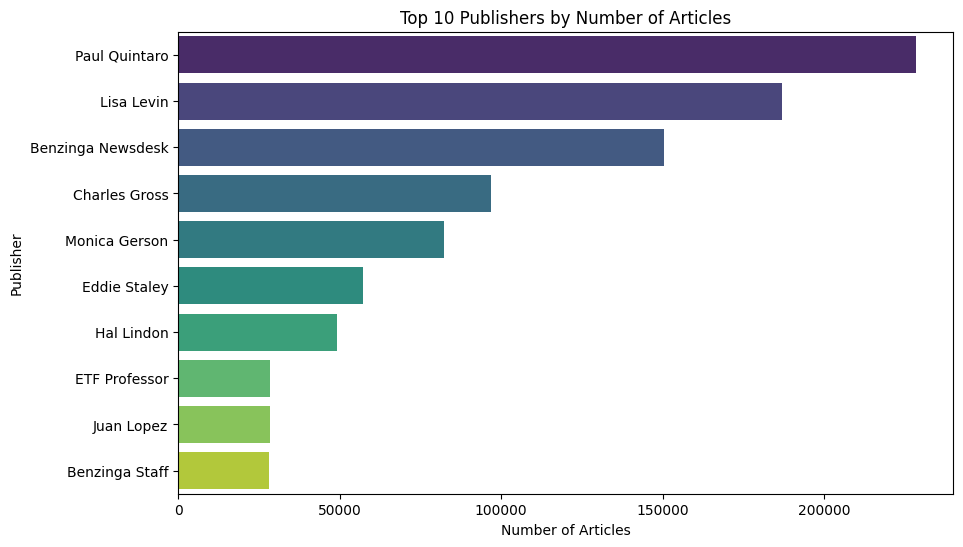

publisher
Happy Trading                     0.765000
Chris Fromhertz                   0.757900
janaviktoria                      0.743000
The Professor                     0.726900
dhiraj.surapaneni@benzinga.com    0.709600
Union Square Ventures             0.709600
Anthony Viola                     0.707692
fnmedia                           0.700300
IIJGII                            0.695550
Marvin Dumont                     0.690800
Name: sentiment_score, dtype: float64


C:\Users\amanu\AppData\Local\Temp\ipykernel_600\127204214.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_sentiment.values, y=publisher_sentiment.index, palette="viridis")


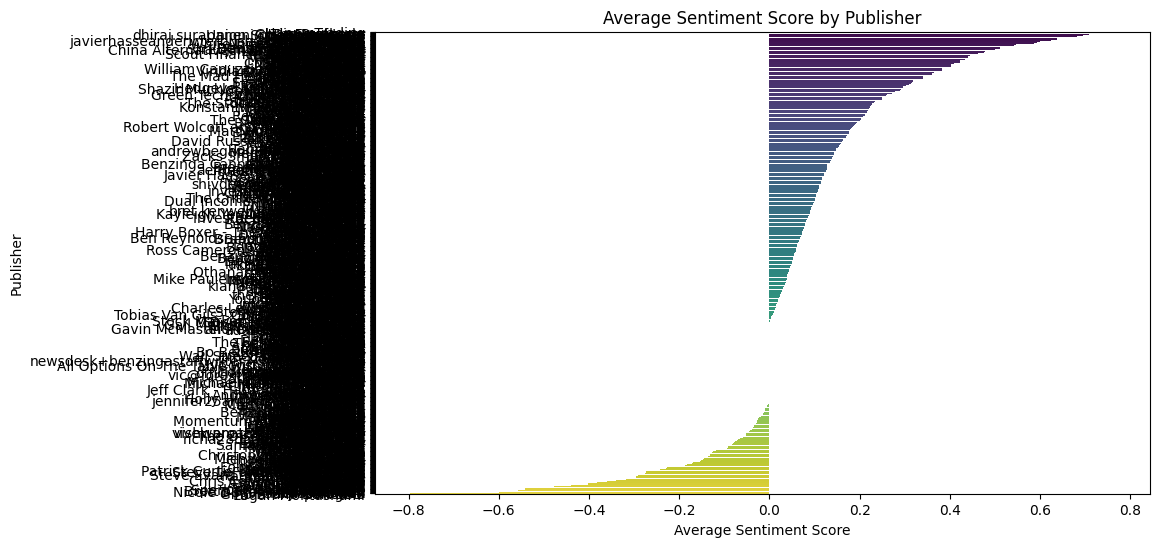

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the data from CSV
file_path = '../data/raw_analyst_ratings.csv'  # Update with your actual file path
data = pd.read_csv(file_path, parse_dates=['date'])

# Check the first few rows of the dataset
print(data.head())

# Check for missing values in the publisher column
print(f"Missing values in publisher column: {data['publisher'].isnull().sum()}")

# Drop rows with missing publisher information (if any)
data = data.dropna(subset=['publisher'])

# Count the number of articles per publisher
publisher_counts = data['publisher'].value_counts()

# Display the top publishers by article count
top_publishers = publisher_counts.head(10)
print(top_publishers)

# Plot the top publishers by article count
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="viridis")
plt.title("Top 10 Publishers by Number of Articles")
plt.xlabel("Number of Articles")
plt.ylabel("Publisher")
plt.show()

# Perform sentiment analysis on the headlines
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the headlines
data['sentiment_score'] = data['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Group by publisher to see the average sentiment score
publisher_sentiment = data.groupby('publisher')['sentiment_score'].mean().sort_values(ascending=False)

# Display the top publishers by sentiment score
print(publisher_sentiment.head(10))

# Plot the average sentiment score by publisher
plt.figure(figsize=(10, 6))
sns.barplot(x=publisher_sentiment.values, y=publisher_sentiment.index, palette="viridis")
plt.title("Average Sentiment Score by Publisher")
plt.xlabel("Average Sentiment Score")
plt.ylabel("Publisher")
plt.show()


In [13]:
from scripts.main import descriptive_statistics,print_headline_statistics,plot_publisher_article_counts,analyze_publication_dates, analyze_day_of_week, analyze_stock_mentions, perform_vader_sentiment_analysis,perform_textblob_sentiment_analysis,visualize_sentiment_distribution,perform_lda_topic_modeling,perform_nmf_topic_modeling, visualize_top_words_in_topics, visualize_topic_distribution, analyze_data